# 4. MACHINE LEARNING MODEL
---

### 4.0. Import libraries and clean dataset

In [10]:
# LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from pickle import dump

# DATASETS
early_train_data = pd.read_csv(r'C:\Users\Francesc\Documents\GitHub\decision-tree-project-tutorial\data\processed\early_x_train.csv')
early_test_data = pd.read_csv(r'C:\Users\Francesc\Documents\GitHub\decision-tree-project-tutorial\data\processed\early_x_test.csv')
clean_train_data = pd.read_csv(r'C:\Users\Francesc\Documents\GitHub\decision-tree-project-tutorial\data\processed\clean_dataset_train.csv')
clean_test_data = pd.read_csv(r'C:\Users\Francesc\Documents\GitHub\decision-tree-project-tutorial\data\processed\clean_dataset_test.csv')
sel_train_data = pd.read_csv(r'C:\Users\Francesc\Documents\GitHub\decision-tree-project-tutorial\data\processed\sel_dataset_train.csv')
sel_test_data = pd.read_csv(r'C:\Users\Francesc\Documents\GitHub\decision-tree-project-tutorial\data\processed\sel_dataset_test.csv')
target = 'Outcome'

# Early Dataset
X_early_train = early_train_data.drop([target], axis=1)
y_early_train = early_train_data[target]
X_early_test = early_test_data.drop([target], axis=1)
y_early_test = early_test_data[target]

# Clean Dataset
X_clean_train = clean_train_data.drop([target], axis=1)
y_clean_train = clean_train_data[target]
X_clean_test = clean_test_data.drop([target], axis=1)
y_clean_test = clean_test_data[target]

# Selected Dataset
X_sel_train = sel_train_data.drop([target], axis=1)
y_sel_train = sel_train_data[target]
X_sel_test = sel_test_data.drop([target], axis=1)
y_sel_test = sel_test_data[target]

### 1.1. Creating a model comparison for all datasets

In [11]:
# Dictionary to store datasets
datasets = {
    'early': {'X_train': X_early_train, 'y_train': y_early_train, 'X_test': X_early_test, 'y_test': y_early_test},
    'clean': {'X_train': X_clean_train, 'y_train': y_clean_train, 'X_test': X_clean_test, 'y_test': y_clean_test},
    'sel': {'X_train': X_sel_train, 'y_train': y_sel_train, 'X_test': X_sel_test, 'y_test': y_sel_test}
}

# Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Loop over datasets
for dataset_name, data in datasets.items():
    X_train, y_train, X_test, y_test = data['X_train'], data['y_train'], data['X_test'], data['y_test']  
    # Fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Additional code for evaluation or other tasks
    # Print the dataset name
    print(f"Model fitted for {dataset_name} dataset has a total score of {round(accuracy_score(y_test, y_pred),3)}.")

Model fitted for early dataset has a total score of 0.747.
Model fitted for clean dataset has a total score of 0.721.
Model fitted for sel dataset has a total score of 0.688.


It is possible to see that the best score is for the early dataset -the one without any type of modification-. The early dataset will be chosen for further analysis.

In [12]:
# REPLACING THE VARIABLES
X_train = X_early_train 
y_train = y_early_train 
X_test = X_early_test
y_test = y_early_test

# model initialization and training 
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 1.2. model graph

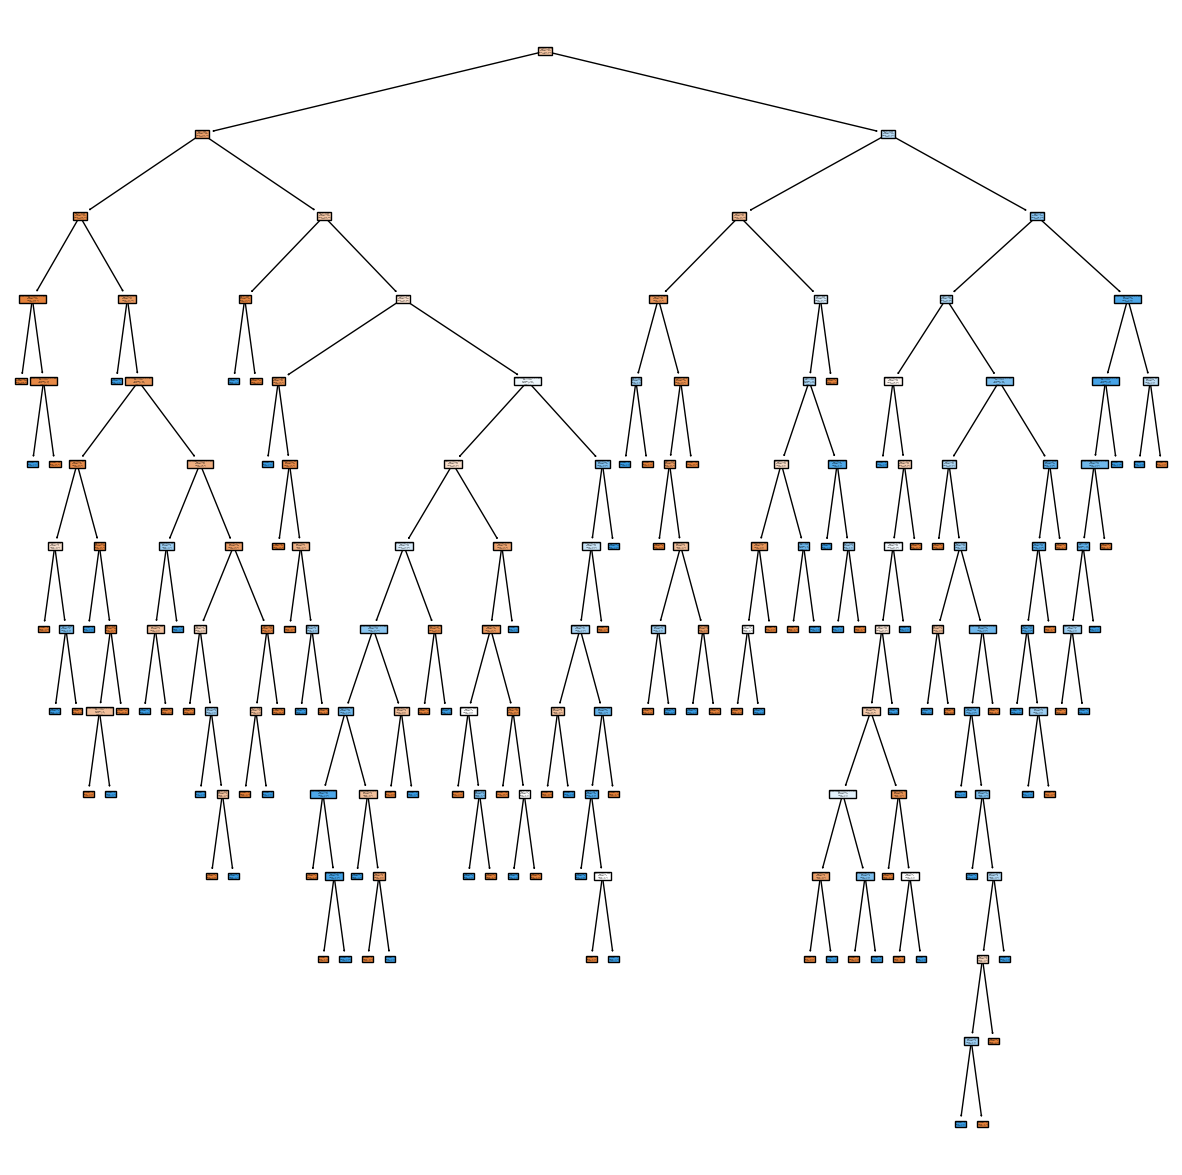

In [13]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
plt.show()

### 1.3. model prediction and score

In [16]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7467532467532467

### 1.4. model optimization

In [23]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1, 20)),
    "min_samples_split": list(range(2, 20)),
    "min_samples_leaf": list(range(1, 8))
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18,
                                               19]},
             scoring='accuracy')

In [24]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 11}


### 1.5. optimized model

In [25]:
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, min_samples_leaf= 2, min_samples_split= 11)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       min_samples_split=11)

In [26]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

After the grid optimization, the model increased the score from 0,747 to 0,753.

### 1.6. saving the model

In [27]:
from pickle import dump
dump(model, open("../models/tree_classifier_crit-entro_maxdepth-8_minleaf-2_minsplit11_42.sav", "wb"))


---
## CONCLUSIONS

- The decision tree had it best performance with the early dataset (without any type of change)

- The model provided an initial score of 0.747.

- The optimization, done under the grid search, provided the following hyperparameters: 'criterion'= 'entropy', 'max_depth'= 8, 'min_samples_leaf'= 2, 'min_samples_split'= 11

- The optimized model provided a total score of 0.753 (an increase of 0.06)